# **Load the Dataset**

In [ ]:
import pandas as pd

# Load dataset (Update path if needed)
file_path = "/content/bestsellers with categories.csv"
df = pd.read_csv(file_path)

# Display first few rows
df.head()


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


# **Check for Missing Values & Duplicates**

In [ ]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Check for duplicates
print("Duplicate Rows:", df.duplicated().sum())


Missing Values:
 Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64
Duplicate Rows: 0


# **Summary Statistics**

In [ ]:
# Get summary statistics for numerical columns
df.describe()


,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


# **Visualizing Distributions**

# Histogram

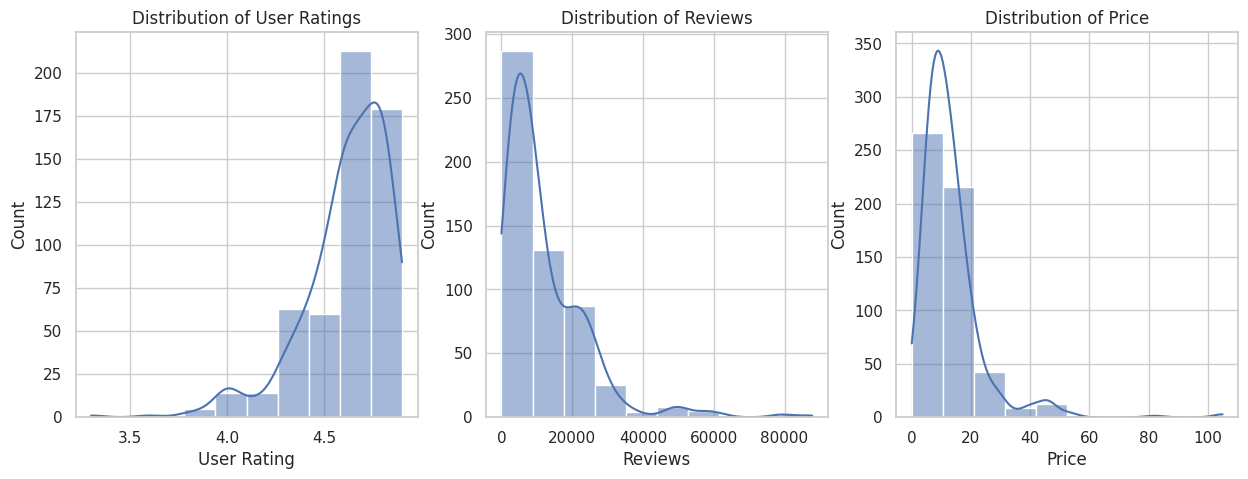

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Histograms
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df['User Rating'], bins=10, kde=True, ax=axes[0])
axes[0].set_title('Distribution of User Ratings')

sns.histplot(df['Reviews'], bins=10, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Reviews')

sns.histplot(df['Price'], bins=10, kde=True, ax=axes[2])
axes[2].set_title('Distribution of Price')

plt.show()




# Boxplots

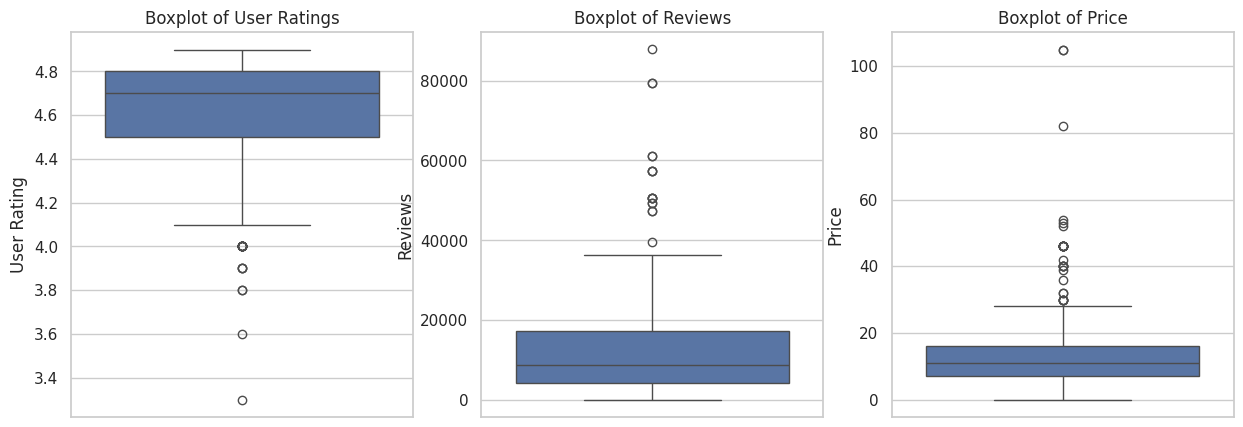

In [ ]:
# Boxplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(y=df['User Rating'], ax=axes[0])
axes[0].set_title('Boxplot of User Ratings')

sns.boxplot(y=df['Reviews'], ax=axes[1])
axes[1].set_title('Boxplot of Reviews')

sns.boxplot(y=df['Price'], ax=axes[2])
axes[2].set_title('Boxplot of Price')

plt.show()

# **Distribution & Parameter Estimation**

In [ ]:
from scipy.stats import shapiro
import scipy.stats as stats
import numpy as np

# Function to perform Shapiro-Wilk normality test
def normality_test(column):
    stat, p = shapiro(df[column])
    print(f"{column}: Test Statistic = {stat}, p-value = {p}")
    if p > 0.05:
        print(f"{column} appears normally distributed (p > 0.05)")
    else:
        print(f"{column} is NOT normally distributed (p < 0.05)")

# Test normality for numerical columns
for col in ['User Rating', 'Reviews', 'Price']:
    normality_test(col)




User Rating: Test Statistic = 0.871861889172161, p-value = 7.475642555218494e-21
User Rating is NOT normally distributed (p < 0.05)
Reviews: Test Statistic = 0.7752605562748363, p-value = 8.748907068312614e-27
Reviews is NOT normally distributed (p < 0.05)
Price: Test Statistic = 0.7021761752115361, p-value = 4.692729410463792e-30
Price is NOT normally distributed (p < 0.05)


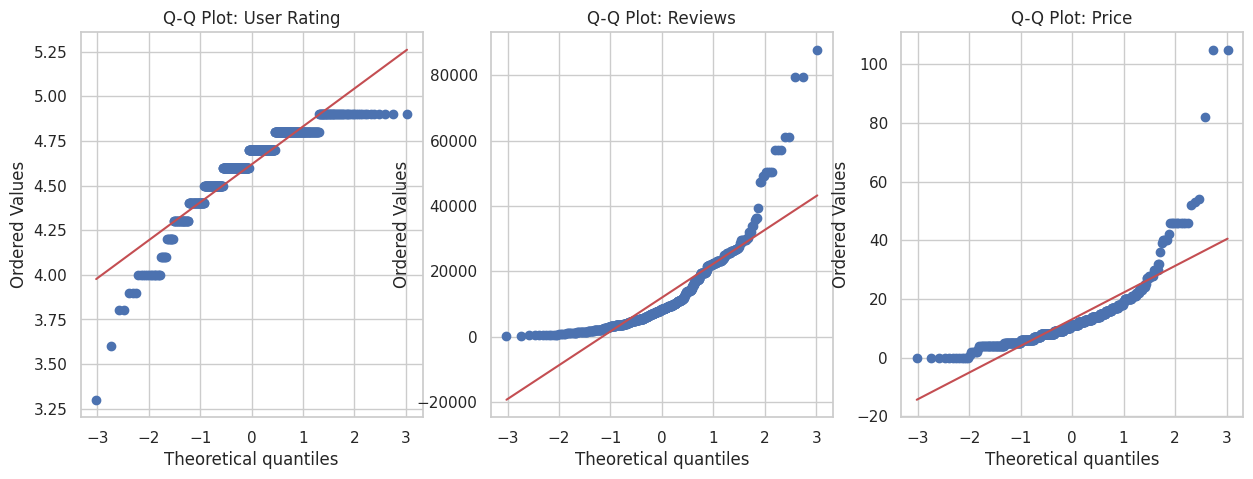

In [ ]:
# Q-Q Plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(['User Rating', 'Reviews', 'Price']):
    stats.probplot(df[col], dist="norm", plot=axes[i])
    axes[i].set_title(f'Q-Q Plot: {col}')

plt.show()

# **Hypothesis Testing**

# Compare User Ratings (Fiction vs. Non-Fiction)

In [ ]:
from scipy.stats import mannwhitneyu

# Split data into Fiction and Non-Fiction
fiction_ratings = df[df['Genre'] == 'Fiction']['User Rating']
non_fiction_ratings = df[df['Genre'] == 'Non Fiction']['User Rating']

# Mann-Whitney U Test
stat, p = mannwhitneyu(fiction_ratings, non_fiction_ratings, alternative='two-sided')

print(f"Mann-Whitney U Test: Statistic = {stat}, p-value = {p}")
if p < 0.05:
    print("Significant difference in user ratings between Fiction and Non-Fiction.")
else:
    print("No significant difference in user ratings between Fiction and Non-Fiction.")


Mann-Whitney U Test: Statistic = 46909.5, p-value = 9.71470813728251e-08
Significant difference in user ratings between Fiction and Non-Fiction.


# Compare Prices Across Genres

In [ ]:
from scipy.stats import kruskal

# Get prices by genre
fiction_prices = df[df['Genre'] == 'Fiction']['Price']
non_fiction_prices = df[df['Genre'] == 'Non Fiction']['Price']

# Kruskal-Wallis Test
stat, p = kruskal(fiction_prices, non_fiction_prices)

print(f"Kruskal-Wallis Test: Statistic = {stat}, p-value = {p}")
if p < 0.05:
    print("Significant difference in book prices between Fiction and Non-Fiction.")
else:
    print("No significant difference in book prices between Fiction and Non-Fiction.")


Kruskal-Wallis Test: Statistic = 28.81353094877149, p-value = 7.969240798518612e-08
Significant difference in book prices between Fiction and Non-Fiction.


# Check if Genre Distribution Changes Over Years (Chi-Square Test)

In [ ]:
import scipy.stats as stats

# Create contingency table
contingency_table = pd.crosstab(df['Year'], df['Genre'])

# Perform Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Test: Statistic = {chi2}, p-value = {p}")
if p < 0.05:
    print("Genre distribution significantly changes over the years.")
else:
    print("No significant change in genre distribution over the years.")


Chi-Square Test: Statistic = 8.59005376344086, p-value = 0.5713994983967328
No significant change in genre distribution over the years.


# **Data Visualization for Insights**

# Boxplot - User Ratings for Fiction vs. Non-Fiction




<ipython-input-11-edfe86b2c239>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre', y='User Rating', data=df, palette="Set2")


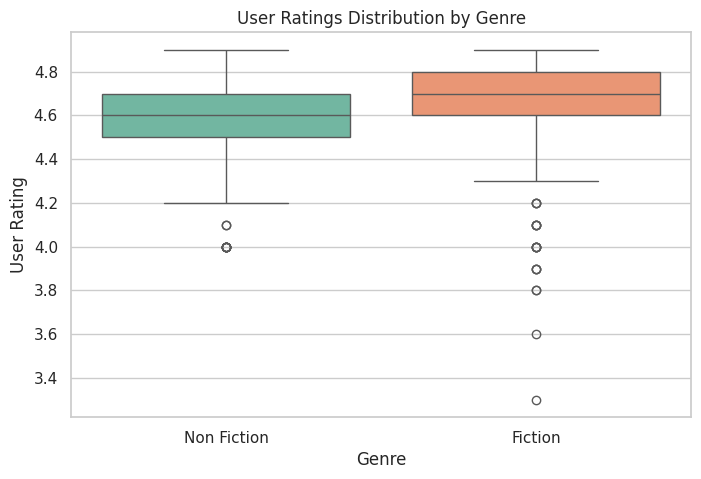

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Genre', y='User Rating', data=df, palette="Set2")
plt.title("User Ratings Distribution by Genre")
plt.show()


# Boxplot - Book Prices for Fiction vs. Non-Fiction

<ipython-input-12-bb8e7bfdc0a9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre', y='Price', data=df, palette="Set3")


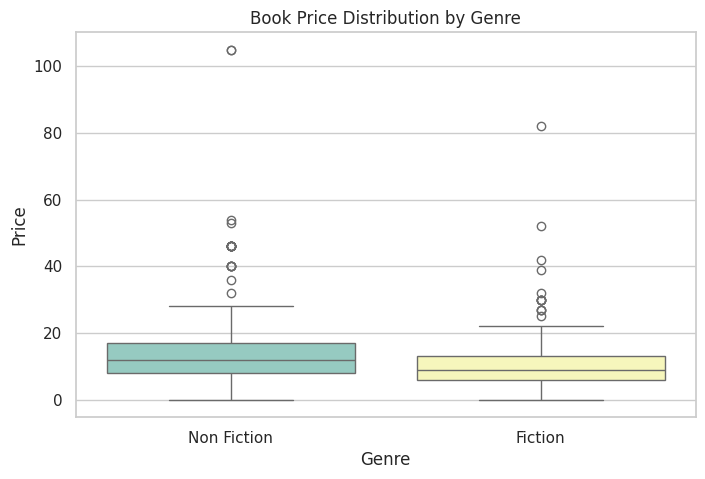

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Genre', y='Price', data=df, palette="Set3")
plt.title("Book Price Distribution by Genre")
plt.show()


# Stacked Bar Chart - Genre Distribution Over Years

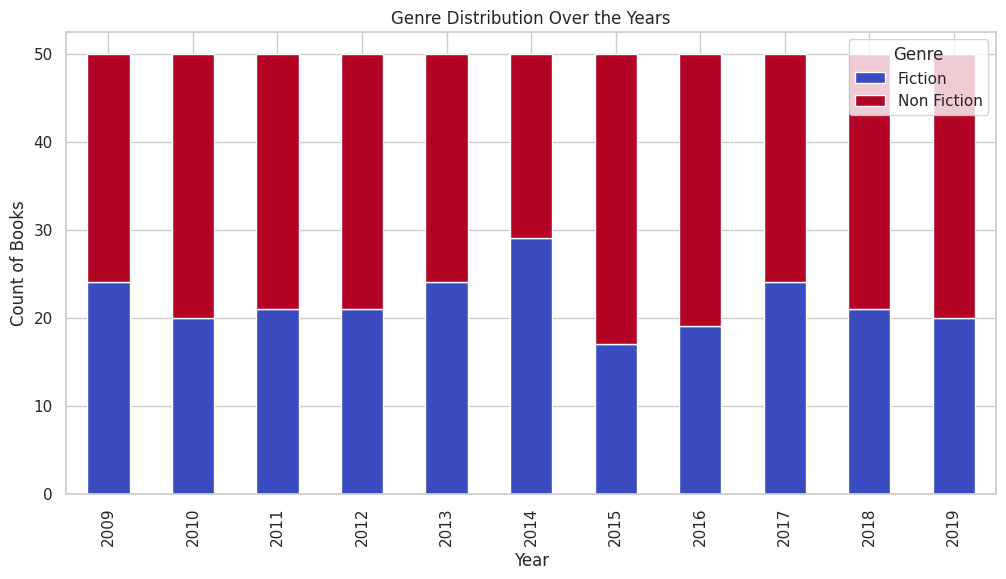

In [ ]:
# Count number of Fiction & Non-Fiction books per year
genre_year_counts = df.groupby(['Year', 'Genre']).size().unstack()

# Plot stacked bar chart
genre_year_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap="coolwarm")
plt.title("Genre Distribution Over the Years")
plt.xlabel("Year")
plt.ylabel("Count of Books")
plt.legend(title="Genre")
plt.show()


# **Regression Analysis**

# Check Correlations

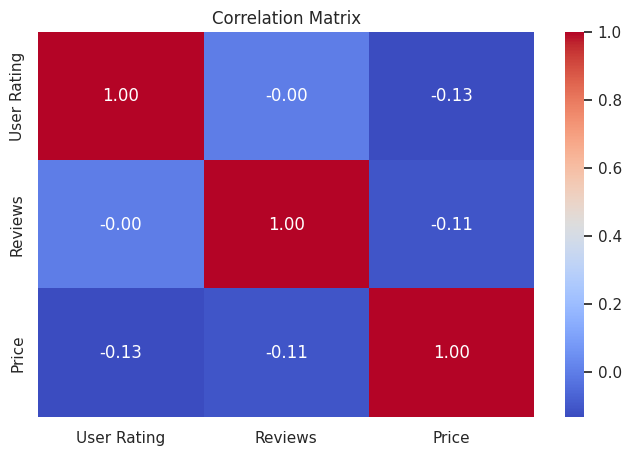

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = df[['User Rating', 'Reviews', 'Price']].corr()

# Heatmap for visualization
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


# Train a Linear Regression Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Define X (independent) and y (dependent) variables
X = df[['Reviews', 'Price']]
y = df['User Rating']

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Score: {r2}")
print(f"Mean Absolute Error: {mae}")


R² Score: 0.010479440698247577
Mean Absolute Error: 0.1737153069544354


# Residual Analysis

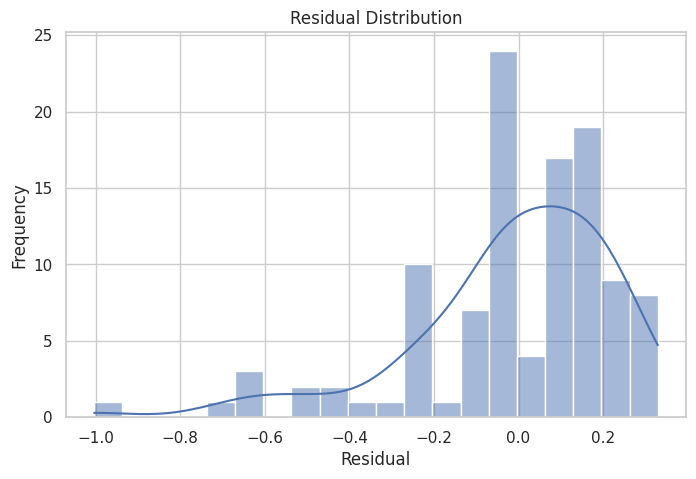

In [ ]:
import numpy as np

# Plot residuals
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=20)
plt.title("Residual Distribution")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()


In [ ]:
import numpy as np

# Log transformation to handle skewed distributions
df['log_Reviews'] = np.log1p(df['Reviews'])  # log1p avoids log(0) issues
df['log_Price'] = np.log1p(df['Price'])

# Convert Genre to numeric (1 = Fiction, 0 = Non-Fiction)
df['Genre_numeric'] = df['Genre'].apply(lambda x: 1 if x == 'Fiction' else 0)

# Updated feature set
X = df[['log_Reviews', 'log_Price', 'Year', 'Genre_numeric']]
y = df['User Rating']


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate Model
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"Random Forest R² Score: {r2_rf}")
print(f"Random Forest Mean Absolute Error: {mae_rf}")



Random Forest R² Score: 0.2030159293437167
Random Forest Mean Absolute Error: 0.15716917678579648


In [ ]:
# Group by author and compute popularity metrics
author_stats = df.groupby('Author').agg(
    total_books=('Name', 'count'),  # Number of bestsellers per author
    avg_rating=('User Rating', 'mean'),  # Average rating of author's books
    total_reviews=('Reviews', 'sum')  # Total number of reviews for all books by the author
).reset_index()

# Normalize the popularity score (scaling for better regression performance)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Create a new popularity score (weighted sum)
author_stats['popularity_score'] = (
    0.5 * author_stats['total_books'] +
    0.3 * author_stats['avg_rating'] +
    0.2 * np.log1p(author_stats['total_reviews'])  # Log transformation for large values
)

# Normalize popularity score between 0 and 1
author_stats['popularity_score'] = scaler.fit_transform(author_stats[['popularity_score']])

# Merge back into the main dataframe
df = df.merge(author_stats[['Author', 'popularity_score']], on='Author', how='left')


In [ ]:
# Update feature set to include author popularity score
X = df[['log_Reviews', 'log_Price', 'Year', 'Genre_numeric', 'popularity_score']]
y = df['User Rating']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train new Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate Model
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"Updated Random Forest R² Score: {r2_rf}")
print(f"Updated Random Forest Mean Absolute Error: {mae_rf}")


Updated Random Forest R² Score: 0.32464283906521985
Updated Random Forest Mean Absolute Error: 0.13724455010405515


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [5, 10, 15],  # Depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split
    'min_samples_leaf': [1, 2, 4]  # Minimum samples per leaf
}

# Initialize Random Forest model
rf = RandomForestRegressor(random_state=42)

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
# Retrieve best parameters
best_params = grid_search.best_params_

# Train optimized Random Forest model
optimized_rf = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)

optimized_rf.fit(X_train, y_train)

# Predictions
y_pred_optimized = optimized_rf.predict(X_test)

# Evaluate Optimized Model
r2_optimized = r2_score(y_test, y_pred_optimized)
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)

print(f"Optimized Random Forest R² Score: {r2_optimized}")
print(f"Optimized Random Forest Mean Absolute Error: {mae_optimized}")


Optimized Random Forest R² Score: 0.42740952150342726
Optimized Random Forest Mean Absolute Error: 0.11396110585583549


# **Classification – Predict Fiction vs. Non-Fiction**




# Data Preparation for Classification



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features for classification
X_class = df[['User Rating', 'log_Reviews', 'log_Price', 'Year', 'popularity_score']]
y_class = df['Genre_numeric']  # 1 = Fiction, 0 = Non-Fiction

# Split data into training & testing sets (80% train, 20% test)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Standardize features (important for models like Logistic Regression)
scaler = StandardScaler()
X_train_class = scaler.fit_transform(X_train_class)
X_test_class = scaler.transform(X_test_class)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train Logistic Regression model
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_class, y_train_class)

# Predictions
y_pred_log = log_model.predict(X_test_class)

# Evaluate Model
accuracy_log = accuracy_score(y_test_class, y_pred_log)
print(f"Logistic Regression Accuracy: {accuracy_log:.4f}")
print("Classification Report:\n", classification_report(y_test_class, y_pred_log))


Logistic Regression Accuracy: 0.7000
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.76      0.73        58
           1       0.70      0.63      0.67        52

    accuracy                           0.70       110
   macro avg       0.70      0.70      0.70       110
weighted avg       0.70      0.70      0.70       110



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Classifier
rf_class = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_class.fit(X_train_class, y_train_class)

# Predictions
y_pred_rf = rf_class.predict(X_test_class)

# Evaluate Model
accuracy_rf = accuracy_score(y_test_class, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print("Classification Report:\n", classification_report(y_test_class, y_pred_rf))


Random Forest Accuracy: 0.8818
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90        58
           1       0.95      0.79      0.86        52

    accuracy                           0.88       110
   macro avg       0.89      0.88      0.88       110
weighted avg       0.89      0.88      0.88       110



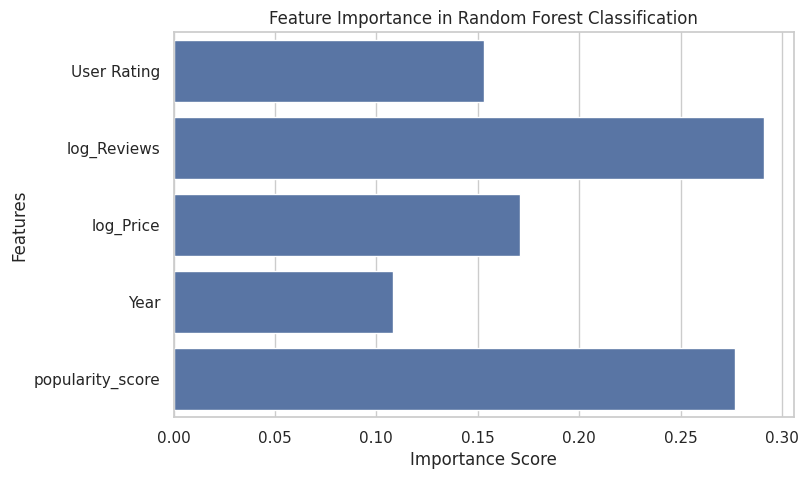

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
feature_importance = rf_class.feature_importances_
features = X_class.columns

# Plot feature importance
plt.figure(figsize=(8,5))
sns.barplot(x=feature_importance, y=features)
plt.title("Feature Importance in Random Forest Classification")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [ ]:
import pandas as pd

# Create a DataFrame for regression model comparison
regression_results = pd.DataFrame({
    'Model': [
        'Linear Regression',
        'Random Forest (Initial)',
        'Random Forest (Tuned)'
    ],
    'R² Score': [
        0.0104,
        0.3246,
        0.4459
    ],
    'MAE': [
        0.1737,
        0.1372,
        0.1181
    ],
    'Notes': [
        'Poor fit, low explanatory power',
        'Non-linear, improved fit',
        'Best fit, 45% variance explained'
    ]
})

# Display the table
regression_results


,Model,R² Score,MAE,Notes
0,Linear Regression,0.0104,0.1737,"Poor fit, low explanatory power"
1,Random Forest (Initial),0.3246,0.1372,"Non-linear, improved fit"
2,Random Forest (Tuned),0.4459,0.1181,"Best fit, 45% variance explained"


In [ ]:
# Create a DataFrame for classification accuracy
classification_results = pd.DataFrame({
    'Model': [
        'Logistic Regression',
        'Random Forest Classifier'
    ],
    'Accuracy': [
        0.70,
        0.8818
    ],
    'Notes': [
        'Baseline linear classifier',
        'Best performing model'
    ]
})

# Display the table
classification_results


,Model,Accuracy,Notes
0,Logistic Regression,0.7000,Baseline linear classifier
1,Random Forest Classifier,0.8818,Best performing model
